# Effective Graph Paper
Code to generate "perturbation_path" figure 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image, display
import graphviz
import cana
import math
from cana.boolean_network import BooleanNetwork
from cana.drawing.canalizing_map import draw_canalizing_map_graphviz
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.text import Text
from matplotlib.patches import Circle, Rectangle, RegularPolygon
from matplotlib.collections import PatchCollection
from IPython.display import display, Image, Latex, SVG, HTML
import networkx as nx
from copy import copy

In [3]:
# Graph Example
logic = {
    0 : {'name':r'x1', 'in':[],     'out':[1] },
    1 : {'name':r'xa', 'in':[0],     'out':[0,0] },
    2 : {'name':r'xb', 'in':[0,1],     'out':[0,1,0,1] },
    3 : {'name':r'xc', 'in':[2],   'out':[0,0]},
    4 : {'name':r'x2', 'in':[1,2,3],   'out':[0,0,1,1, 0,0,0,1]}, # [0,0,1,1, 0,0,0,1]
}
N = cana.boolean_network.BooleanNetwork(name='A', Nnodes=len(logic), logic=logic)
print(N)

"""
pos = {}
cx,cy = 1.5,1.5
for i,deg in zip([2,1,4],np.linspace(0,360,4)):
    r = .8
    deg += 90
    x, y = cx+r*math.cos(math.radians(deg)), cy+r*math.sin(math.radians(deg))
    pos[i] = "{:.2f},{:.2f}".format(x,y)
    print(pos[i])
pos[0] = "0.3,2.7"
pos[3] = "2.7,2.6"
"""
pos = {
    0:'0.23,2.0',
    1:'0.74,1.20',
    2:'1.55,1.80',
    3:'2.9,1.9',
    4:'2.28,1.10'
}

# COlorbar
interval = np.linspace(0.3, 1.0, 256)
colors = plt.cm.Greys(interval)
cmap = LinearSegmentedColormap.from_list('custom', colors)
cmap.set_under('#A90533')
norm = mpl.colors.Normalize(vmin=0, vmax=1)


SG = N.structural_graph()
EG = N.effective_graph(mode='input', bound='mean')
nx.set_node_attributes(SG, pos, 'pos')
nx.set_node_attributes(EG, pos, 'pos')

<BNetwork(Name='A', N=5, Nodes=['x1', 'xa', 'xb', 'xc', 'x2'])>


(0, {'pos': '0.23,2.0', 'label': 'x1'})
(1, {'pos': '0.74,1.20', 'label': 'xa'})
(2, {'pos': '1.55,1.80', 'label': 'xb'})
(3, {'pos': '2.9,1.9', 'label': 'xc'})
(4, {'pos': '2.28,1.10', 'label': 'x2'})


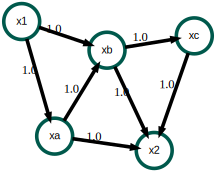

u'/Users/rionbr/Sites/CANA/tutorials/2019 - Effective Graph/figure-perturb/SG.svg'

In [4]:
S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', size='3,3', concentrate='false', simplify='false', overlap='false',splines='false',ratio='1')
S.attr('node', pin='true', shape='circle', fixedsize='true', width='.55', color='#00594c', style='filled', fillcolor='#515660', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

for nid,d in SG.nodes(data=True):
    print(nid,d)
    nid = str(nid)
    label = str(d['label'])
    pos = d['pos']
    fillcolor = 'white'
    S.node(nid, label=label, pos=pos, fillcolor=fillcolor)

for uid,vid,d in SG.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    label = str(d['weight'])
    S.edge(uid, vid, label=label)
    
display(SVG(S.pipe(format='svg')),metadata={'isolated':True})
# Export
S._format = 'svg'
efile = u"{path:s}/Figure-perturbations/SG".format(path=os.getcwd())
S.render(efile, cleanup=True)

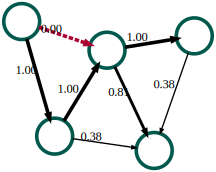

u'/Users/rionbr/Sites/CANA/tutorials/2019 - Effective Graph/figure-perturb/EG.svg'

In [5]:
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', size='3,3', concentrate='false', simplify='false', overlap='false',splines='false', ratio='1')
E.attr('node', pin='true', shape='circle', fixedsize='true', width='.55', color='#00594c', style='filled', fillcolor='#515660', penwidth='4', fontname='Helvetica', fontcolor='black',fontsize='12')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='black', penwidth='4')

for nid,d in EG.nodes(data=True):
    nid = str(nid)
    label = '' #str(d['label'])
    pos = d['pos']
    fillcolor = 'white'
    E.node(nid, label=label, pos=pos, fillcolor=fillcolor)

max_penwidth = 4
for uid,vid,d in EG.edges(data=True):
    uid = str(uid)
    vid = str(vid)
    weight = '{:f}'.format(d['weight']*100)
    penwidth = '%.2f' % ( d['weight']*max_penwidth )
    label = "{:.2f}".format(d['weight'])
    if d['weight'] > 0:
        rgb = cmap(d['weight'])
        hex = mpl.colors.rgb2hex(rgb)
        E.edge(uid,vid,label=label,weight=weight, penwidth=penwidth)
    else:
        E.edge(uid,vid,label=label,style='dashed',color='#A90533')
    
display(SVG(E.pipe(format='svg')),metadata={'isolated':True})
# Export
E._format = 'svg'
efile = u"{path:s}/Figure-perturbations/EG".format(path=os.getcwd())
E.render(efile, cleanup=True)

# Correlation Plot

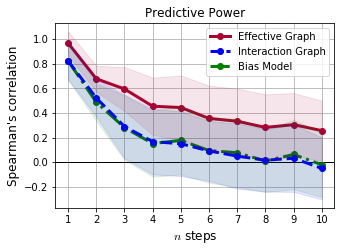

In [7]:
corr_mat  = np.load("Figure-perturbations/CorrelationMatrixN30K2B04.npy")
fig, ax = plt.subplots(1,1,figsize=(5,3.4))

n_steps = 10
colors = ['#A90533', 'blue', 'green']
labels = ['Effective Graph', 'Interaction Graph', 'Bias Model']
ls = ['-','--','-.']
for ip in [0,1,2]:
    corrmean = np.nanmean(corr_mat[ip], axis=(0,1))
    corrstd = np.nanstd(corr_mat[ip], axis=(0,1))
                        
    ax.fill_between( np.arange(1,n_steps+1), corrmean-corrstd, corrmean+corrstd , color=colors[ip], alpha=0.1,
            zorder=10-ip)                 
    ax.plot(np.arange(1,n_steps+1), corrmean, c=colors[ip], label=labels[ip],
            marker='o', ms=6, lw=3, ls=ls[ip], zorder=5-ip)
    
ax.axhline(0,c='#000000', lw=1, zorder=2)

#ax.set_xlim(0.6,10.4)
#ax.set_ylim(-.12,1.1)
ax.set_title("Predictive Power")
ax.set_ylabel("Spearman's correlation",fontsize=12)
ax.set_xlabel(r'$n$ steps',fontsize=12)
ax.set_xticks(np.arange(1,11,1))
ax.grid(zorder=1)
ax.legend(loc=0)

plt.savefig("Figure-perturbations/perturb-models.svg", dpi=150)
plt.show()